# Modeling of Peartree Roundabout Traffic

In [4]:
# change directory to parent folder to access all folders
import os
path = os.path.dirname(os.getcwd())
os.chdir(path)
from data_preprocessing.classes.load_traffic_data import Import_Traffic_Data

In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import ast
import keras
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense,concatenate
from stellargraph import StellarGraph, StellarDiGraph
import stellargraph as sg
from datetime import datetime
from stellargraph.layer import GCN_LSTM
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import seaborn as sns
from classes import model_performance,preprocessing
import pickle

## Load Traffic Data

In [6]:
# Peartree roundabout bbox and datetimes of interest
top=51.798433
bottom=51.791451
right=-1.281979
left=-1.289524
datetime_start=datetime(2021,6,23,0,0)
datetime_end=datetime(2021,7,13,10,50)

# load in traffic data
traffic_data,time = Import_Traffic_Data(top,bottom,right,left).load_traffic_data(datetime_start,datetime_end)

The number of road segments within the area of interest is:  70
202106230000
202106230005
202106230010
202106230015
202106230020
202106230025
202106230030
202106230035
202106230040
202106230045
202106230050
202106230055
202106230100
202106230105
202106230110
202106230115
202106230120
202106230125
202106230130
202106230135
202106230140
202106230145
202106230150
202106230155
202106230200
202106230205
202106230210
202106230215
202106230220
202106230225
202106230230
202106230235
202106230240
202106230245
202106230250
202106230255
202106230300
202106230305
202106230310
202106230315
202106230320
202106230325
202106230330
202106230335
202106230340
202106230345
202106230350
202106230355
202106230400
202106230405
202106230410
202106230415
202106230420
202106230425
202106230430
202106230435
202106230440
202106230445
202106230450
202106230455
202106230500
202106230505
202106230510
202106230515
202106230520
202106230525
202106230530
202106230535
202106230540
202106230545
202106230550
202106230555


202106250420
202106250425
202106250430
202106250435
202106250440
202106250445
202106250450
202106250455
202106250500
202106250505
202106250510
202106250515
202106250520
202106250525
202106250530
202106250535
202106250540
202106250545
202106250550
202106250555
202106250600
202106250605
202106250610
202106250615
202106250620
202106250625
202106250630
202106250635
202106250640
202106250645
202106250650
202106250655
202106250700
202106250705
202106250710
202106250715
202106250720
202106250725
202106250730
202106250735
202106250740
202106250745
202106250750
202106250755
202106250800
202106250805
202106250810
202106250815
202106250820
202106250825
202106250830
202106250835
202106250840
202106250845
202106250850
202106250855
202106250900
202106250905
202106250910
202106250915
202106250920
202106250925
202106250930
202106250935
202106250940
202106250945
202106250950
202106250955
202106251000
202106251005
202106251010
202106251015
202106251020
202106251025
202106251030
202106251035
202106251040

202106270950
202106270955
202106271000
202106271005
202106271010
202106271015
202106271020
202106271025
202106271030
202106271035
202106271040
202106271045
202106271050
202106271055
202106271100
202106271105
202106271110
202106271115
202106271120
202106271125
202106271130
202106271135
202106271140
202106271145
202106271150
202106271155
202106271200
202106271205
202106271210
202106271215
202106271220
202106271225
202106271230
202106271235
202106271240
202106271245
202106271250
202106271255
202106271300
202106271305
202106271310
202106271315
202106271320
202106271325
202106271330
202106271335
202106271340
202106271345
202106271350
202106271355
202106271400
202106271405
202106271410
202106271415
202106271420
202106271425
202106271430
202106271435
202106271440
202106271445
202106271450
202106271455
202106271500
202106271505
202106271510
202106271515
202106271520
202106271525
202106271530
202106271535
202106271540
202106271545
202106271550
202106271555
202106271600
202106271605
202106271610

202106291455
202106291500
202106291505
202106291510
202106291515
202106291520
202106291525
202106291530
202106291535
202106291540
202106291545
202106291550
202106291555
202106291600
202106291605
202106291610
202106291615
202106291620
202106291625
202106291630
202106291635
202106291640
202106291645
202106291650
202106291655
202106291700
202106291705
202106291710
202106291715
202106291720
202106291725
202106291730
202106291735
202106291740
202106291745
202106291750
202106291755
202106291800
202106291805
202106291810
202106291815
202106291820
202106291825
202106291830
202106291835
202106291840
202106291845
202106291850
202106291855
202106291900
202106291905
202106291910
202106291915
202106291920
202106291925
202106291930
202106291935
202106291940
202106291945
202106291950
202106291955
202106292000
202106292005
202106292010
202106292015
202106292020
202106292025
202106292030
202106292035
202106292040
202106292045
202106292050
202106292055
202106292100
202106292105
202106292110
202106292115

202107012020
202107012025
202107012030
202107012035
202107012040
202107012045
202107012050
202107012055
202107012100
202107012105
202107012110
202107012115
202107012120
202107012125
202107012130
202107012135
202107012140
202107012145
202107012150
202107012155
202107012200
202107012205
202107012210
202107012215
202107012220
202107012225
202107012230
202107012235
202107012240
202107012245
202107012250
202107012255
202107012300
202107012305
202107012310
202107012315
202107012320
202107012325
202107012330
202107012335
202107012340
202107012345
202107012350
202107012355
202107020000
202107020005
202107020010
202107020015
202107020020
202107020025
202107020030
202107020035
202107020040
202107020045
202107020050
202107020055
202107020100
202107020105
202107020110
202107020115
202107020120
202107020125
202107020130
202107020135
202107020140
202107020145
202107020150
202107020155
202107020200
202107020205
202107020210
202107020215
202107020220
202107020225
202107020230
202107020235
202107020240

202107040115
202107040120
202107040125
202107040130
202107040135
202107040140
202107040145
202107040150
202107040155
202107040200
202107040205
202107040210
202107040215
202107040220
202107040225
202107040230
202107040235
202107040240
202107040245
202107040250
202107040255
202107040300
202107040305
202107040310
202107040315
202107040320
202107040325
202107040330
202107040335
202107040340
202107040345
202107040350
202107040355
202107040400
202107040405
202107040410
202107040415
202107040420
202107040425
202107040430
202107040435
202107040440
202107040445
202107040450
202107040455
202107040500
202107040505
202107040510
202107040515
202107040520
202107040525
202107040530
202107040535
202107040540
202107040545
202107040550
202107040555
202107040600
202107040605
202107040610
202107040615
202107040620
202107040625
202107040630
202107040635
202107040640
202107040645
202107040650
202107040655
202107040700
202107040705
202107040710
202107040715
202107040720
202107040725
202107040730
202107040735

202107060710
202107060715
202107060720
202107060725
202107060730
202107060735
202107060740
202107060745
202107060750
202107060755
202107060800
202107060805
202107060810
202107060815
202107060820
202107060825
202107060830
202107060835
202107060840
202107060845
202107060850
202107060855
202107060900
202107060905
202107060910
202107060915
202107060920
202107060925
202107060930
202107060935
202107060940
202107060945
202107060950
202107060955
202107061000
202107061005
202107061010
202107061015
202107061020
202107061025
202107061030
202107061035
202107061040
202107061045
202107061050
202107061055
202107061100
202107061105
202107061110
202107061115
202107061120
202107061125
202107061130
202107061135
202107061140
202107061145
202107061150
202107061155
202107061200
202107061205
202107061210
202107061215
202107061220
202107061225
202107061230
202107061235
202107061240
202107061245
202107061250
202107061255
202107061300
202107061305
202107061310
202107061315
202107061320
202107061325
202107061330

202107081255
202107081300
202107081305
202107081310
202107081315
202107081320
202107081325
202107081330
202107081335
202107081340
202107081345
202107081350
202107081355
202107081400
202107081405
202107081410
202107081415
202107081420
202107081425
202107081430
202107081435
202107081440
202107081445
202107081450
202107081455
202107081500
202107081505
202107081510
202107081515
202107081520
202107081525
202107081530
202107081535
202107081540
202107081545
202107081550
202107081555
202107081600
202107081605
202107081610
202107081615
202107081620
202107081625
202107081630
202107081635
202107081640
202107081645
202107081650
202107081655
202107081700
202107081705
202107081710
202107081715
202107081720
202107081725
202107081730
202107081735
202107081740
202107081745
202107081750
202107081755
202107081800
202107081805
202107081810
202107081815
202107081820
202107081825
202107081830
202107081835
202107081840
202107081845
202107081850
202107081855
202107081900
202107081905
202107081910
202107081915

202107101830
202107101835
202107101840
202107101845
202107101850
202107101855
202107101900
202107101905
202107101910
202107101915
202107101920
202107101925
202107101930
202107101935
202107101940
202107101945
202107101950
202107101955
202107102000
202107102005
202107102010
202107102015
202107102020
202107102025
202107102030
202107102035
202107102040
202107102045
202107102050
202107102055
202107102100
202107102105
202107102110
202107102115
202107102120
202107102125
202107102130
202107102135
202107102140
202107102145
202107102150
202107102155
202107102200
202107102205
202107102210
202107102215
202107102220
202107102225
202107102230
202107102235
202107102240
202107102245
202107102250
202107102255
202107102300
202107102305
202107102310
202107102315
202107102320
202107102325
202107102330
202107102335
202107102340
202107102345
202107102350
202107102355
202107110000
202107110005
202107110010
202107110015
202107110020
202107110025
202107110030
202107110035
202107110040
202107110045
202107110050

202107122310
202107122315
202107122320
202107122325
202107122330
202107122335
202107122340
202107122345
202107122350
202107122355
202107130000
202107130005
202107130010
202107130015
202107130020
202107130025
202107130030
202107130035
202107130040
202107130045
202107130050
202107130055
202107130100
202107130105
202107130110
202107130115
202107130120
202107130125
202107130130
202107130135
202107130140
202107130145
202107130150
202107130155
202107130200
202107130205
202107130210
202107130215
202107130220
202107130225
202107130230
202107130235
202107130240
202107130245
202107130250
202107130255
202107130300
202107130305
202107130310
202107130315
202107130320
202107130325
202107130330
202107130335
202107130340
202107130345
202107130350
202107130355
202107130400
202107130405
202107130410
202107130415
202107130420
202107130425
202107130430
202107130435
202107130440
202107130445
202107130450
202107130455
202107130500
202107130505
202107130510
202107130515
202107130520
202107130525
202107130530

In [7]:
# speed capped by speed limit
sp = traffic_data[:,:,5]

# coordinates
lons = traffic_data[0,:,4]
lats = traffic_data[0,:,3]

## Load WX data

In [8]:
# load in 5min wx data from csv
wx_df = pd.read_csv("data_collection/data/wx_data/oxfordcity_wx_variables_5min_intervals.csv")

In [9]:
# collect variables of significance
wx_vars = wx_df[['precipitationIntensity','temperature','humidity','weatherCode']].T

for i in range(4):
    wx_vars.iloc[i] = (wx_vars.iloc[i] - wx_vars.iloc[i].min())/(wx_vars.iloc[i].max() - wx_vars.iloc[i].min())
    
wx_vars = wx_vars.values
#scaler = MinMaxScaler()
#wx_vars = scaler.fit_transform(wx_vars)


## Create Road-Network Graph

In [10]:
# load in csv of node connections
connections = pd.read_csv(f"{path}/data_preprocessing/peartree_roundabout.csv")
connections.head(5)

,Unnamed: 0,road_name,connections,direction,lat_start,lat_end,lon_start,lon_end,feeding_roads,type
0,1176,Wolvercote,Wolvercote1176,+,51.79751,51.79719,-1.28848,-1.28802,NaN,road
1,1177,Wolvercote,Wolvercote1177,+,51.79719,51.79704,-1.28802,-1.28746,1176,road
2,1178,Wolvercote,Wolvercote1178,+,51.79704,51.79704,-1.28746,-1.28735,"[1963,1177]",roundabout
3,1179,Wolvercote,Wolvercote1179,+,51.79704,51.79686,-1.28735,-1.28721,1178,roundabout
4,1180,Wolvercote,Wolvercote1180,+,51.79686,51.79681,-1.28721,-1.28726,1179,roundabout


In [11]:
# convert feeding roads to integers
for i in range(len(connections)):
#for i in range(4):
    try:
        connections.feeding_roads.iloc[i] = ast.literal_eval(connections.feeding_roads.iloc[i])
    except ValueError:
        connections.feeding_roads.iloc[i] = np.nan

# node connections
nodes = connections["Unnamed: 0"]
roads = connections.feeding_roads

# replace nans with 0's
connections.feeding_roads = connections.feeding_roads.fillna(0)

# loop thru and establish edges
edge_list = []
for row in range(len(roads)):
    node1 = connections["Unnamed: 0"].iloc[row]
    node2 = connections.feeding_roads.iloc[row]
    try:
        for i in range(len(node2)):
            edge_list.append([node2[i], node1])
        #node2 = connections.feeding_roads.iloc[row]
    except TypeError:
        edge_list.append([node2, node1])
        
# remove 0's
edges = []
for edge in edge_list:
    if edge[0]==0:
        pass
    else:
        edges.append(edge)      

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
#build the graph
G = nx.Graph()
for i in range(len(nodes)):
    G.add_node(nodes[i],spd=sp[:,i])
    #G.add_edge(nodes[i])
#G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [13]:
# get adjacency matrix 
A = nx.to_numpy_array(G)

# convert graph to stellargraph object for modeling
square = StellarGraph.from_networkx(G,node_features="spd")

# get feature matrix
X = square.node_features()
#X = sp.T

# Modeling: GCN_LSTM

###### Train/Test Split

In [14]:
# specify the training rate
train_rate = 0.8

# replace missing values with nans
X = np.where(X<0,0,X)

# split train/test
train_data, test_data = preprocessing.train_test_split(X, train_rate)

print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)

Train data:  (70, 4712)
Test data:  (70, 1179)


###### Scale Data

In [15]:
# scale data based on max/min
train_scaled, test_scaled = preprocessing.scale_data(train_data, test_data)

###### Pre-process data based on sequence and prediction length

In [ ]:
# the number of timesteps up to the prediction that we will feed to the model (5-minute intervals)
seq_len = 12

# the amount of time in advance we want to predict (5-minute intervals)
pre_len = 1

In [ ]:
trainX, trainY, testX, testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

# Model Training

## 5-min sequence length

In [ ]:
gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=A,
    gc_layer_sizes=[10],
    gc_activations=["linear"],
    lstm_layer_sizes=[200],
    lstm_activations=["linear"],
    dropout=0.0,
)
# model architecture with keras
x_input, x_output = gcn_lstm.in_out_tensors()
model_tgcn = Model(inputs=x_input, outputs=x_output)

# compile model
optimizer = keras.optimizers.Adam(lr=0.001)
model_tgcn.compile(optimizer=optimizer, loss="mse", metrics=["mse"])

history = model_tgcn.fit(
    x=trainX,
    y=trainY,
    epochs=75,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(testX,testY)
)

In [ ]:
sg.utils.plot_history(history)

## Save Model Weights (T-GCN: 5-min prediction)

In [ ]:
# save model to folder
#model_tgcn.save('modeling/models/tgcn-5min')


# load the model from disk
#import keras
#model_tgcn = keras.models.load_model('modeling/models/tgcn-5min')

## 15-min sequence length

In [ ]:
# the number of timesteps up to the prediction that we will feed to the model (5-minute intervals)
seq_len = 12

# the amount of time in advance we want to predict (5-minute intervals)
pre_len = 3

trainX, trainY, testX, testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

In [ ]:
gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=A,
    gc_layer_sizes=[15],
    gc_activations=["linear"],
    lstm_layer_sizes=[200],
    lstm_activations=["linear"],
    dropout=0.1,
)
# model architecture with keras
x_input, x_output = gcn_lstm.in_out_tensors()
model_tgcn_15 = Model(inputs=x_input, outputs=x_output)

# compile model
optimizer = keras.optimizers.Adam(lr=0.001)
model_tgcn_15.compile(optimizer=optimizer, loss="mse", metrics=["mse"])

history_15 = model_tgcn_15.fit(
    x=trainX,
    y=trainY,
    epochs=50,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(testX,testY)
)

In [ ]:
pre_len

In [ ]:
sg.utils.plot_history(history_15)

In [ ]:
# save model to folder
model_tgcn_15.save('modeling/models/tgcn-15min')


# load the model from disk
#import keras
#model = keras.models.load_model('modeling/models/lstm-5min')

## 30-min sequence length

In [ ]:
# the number of timesteps up to the prediction that we will feed to the model (5-minute intervals)
seq_len = 12

# the amount of time in advance we want to predict (5-minute intervals)
pre_len = 6

trainX, trainY, testX, testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

In [ ]:
gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=A,
    gc_layer_sizes=[15],
    gc_activations=["linear"],
    lstm_layer_sizes=[100],
    lstm_activations=["relu"],
    dropout=0.1,
)
# model architecture with keras
x_input, x_output = gcn_lstm.in_out_tensors()
model_tgcn_30 = Model(inputs=x_input, outputs=x_output)

# compile model
optimizer = keras.optimizers.Adam(lr=0.001)
model_tgcn_30.compile(optimizer=optimizer, loss="mse", metrics=["mse"])

history_30 = model_tgcn_30.fit(
    x=trainX,
    y=trainY,
    epochs=35,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(testX,testY)
)

In [ ]:
sg.utils.plot_history(history_30)

In [ ]:
# save model to folder
model_tgcn_30.save('modeling/models/tgcn-30min')


# load the model from disk
#import keras
#model = keras.models.load_model('modeling/models/lstm-5min')

## 60-min sequence length

In [43]:
# the number of timesteps up to the prediction that we will feed to the model (5-minute intervals)
seq_len = 12*24

# the amount of time in advance we want to predict (5-minute intervals)
pre_len = 12

trainX, trainY, testX, testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(4413, 70, 288)
(4413, 70)
(880, 70, 288)
(880, 70)


In [44]:
gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=A,
    gc_layer_sizes=[15],
    gc_activations=["linear"],
    lstm_layer_sizes=[100],
    lstm_activations=["relu"],
    dropout=0.1,
)
# model architecture with keras
x_input, x_output = gcn_lstm.in_out_tensors()
model_tgcn_60 = Model(inputs=x_input, outputs=x_output)

# compile model
optimizer = keras.optimizers.Adam(lr=0.001)
model_tgcn_60.compile(optimizer=optimizer, loss="mse", metrics=["mse"])

history_60 = model_tgcn_60.fit(
    x=trainX,
    y=trainY,
    epochs=20,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(testX,testY)
)

<ipython-input-44-eeae4a7c960a>:1: ExperimentalWarning: GCN_LSTM is experimental: Lack of unit tests and code refinement (see: https://github.com/stellargraph/stellargraph/issues/1132, https://github.com/stellargraph/stellargraph/issues/1526, https://github.com/stellargraph/stellargraph/issues/1564). It may be difficult to use and may have major changes at any time.
  gcn_lstm = GCN_LSTM(


Epoch 1/20
69/69 [==============================] - 5s 42ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2/20
69/69 [==============================] - 2s 33ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3/20
69/69 [==============================] - 2s 32ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 4/20
69/69 [==============================] - 2s 33ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5/20
69/69 [==============================] - 2s 33ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6/20
69/69 [==============================] - 2s 35ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7/20
69/69 [==============================] - 3s 38ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8/20
69/69 [==============================] - 3s 38ms/step - loss: 0.0062 - m

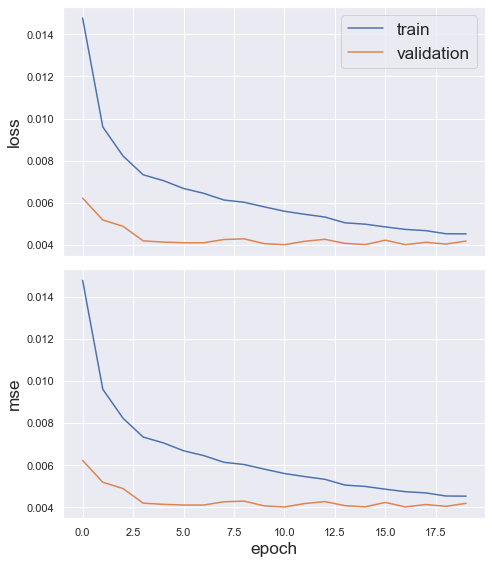

In [45]:
sg.utils.plot_history(history_60)

In [37]:
# save model to folder
#model_tgcn_60.save('modeling/models/tgcn-60min')


# load the model from disk
#import keras
#model = keras.models.load_model('modeling/models/lstm-5min')

In [46]:
yhat = model_tgcn_60.predict(testX)

## Rescale values
max_speed = train_data.max()
min_speed = train_data.min()

## actual train and test values
test_rescref = np.array(testY * max_speed)

## Rescale model predicted values
test_rescpred = np.array((yhat) * max_speed)

Linear Regression

## Performance Charts

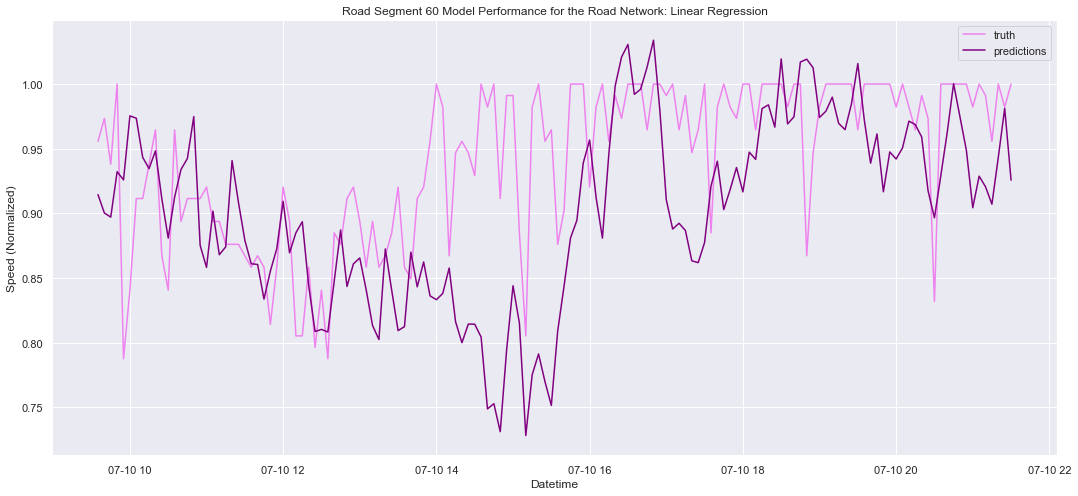

MSE for Road Segment 60: 0.005245244596153498
MAE for Road Segment 60: 0.0523984469473362
R2 for Road Segment 60: 0.9008329576494156


In [47]:
model = model_performance.spatio_temporal_traffic_model()
model.fit(trainX,trainY,testX,testY)
model.plot_specific_road_speed_performance("Linear Regression",time=time,road_seg_num=60,window=12*12)

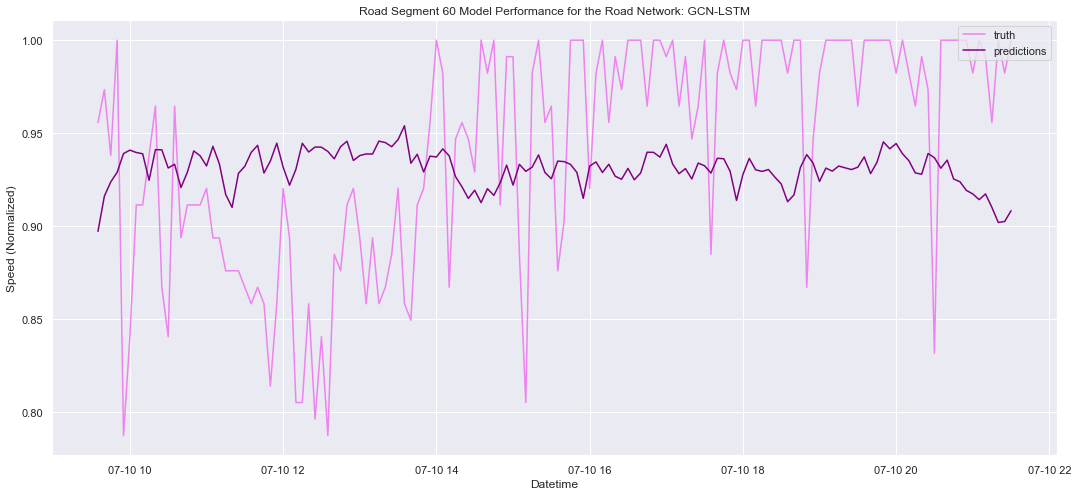

MSE for Road Segment 60: 0.002592293778434396
MAE for Road Segment 60: 0.040909118950366974
R2 for Road Segment 60: 0.9509898757446825


In [48]:
model.plot_specific_road_speed_performance("GCN-LSTM",time=time, road_seg_num=60,predictions=yhat.T,true=testY,window=12*12)



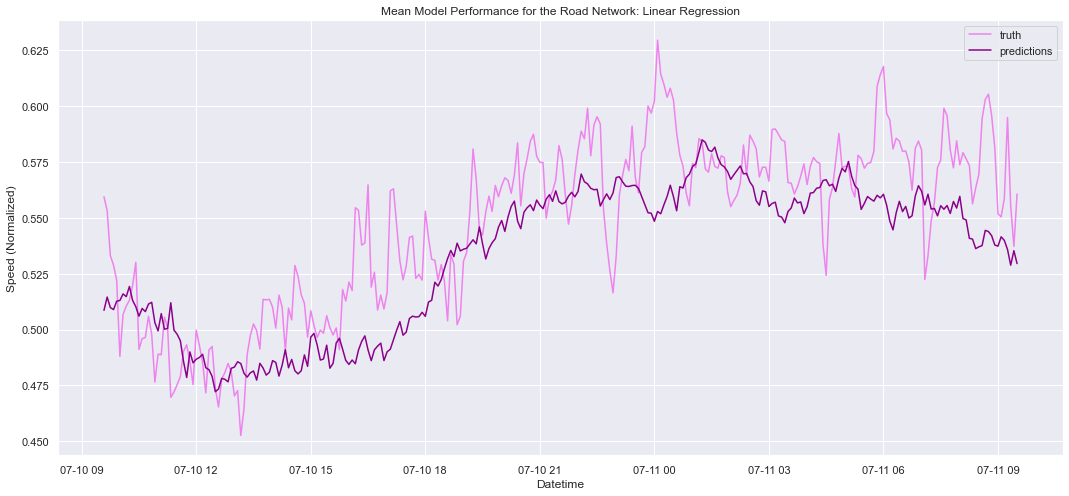

MSE: 0.004443041514605284
MAE: 0.047623008489608765
R2: 0.8797078064132516


In [49]:
model.plot_mean_road_speed_performance("Linear Regression",time=time,window=12*24)

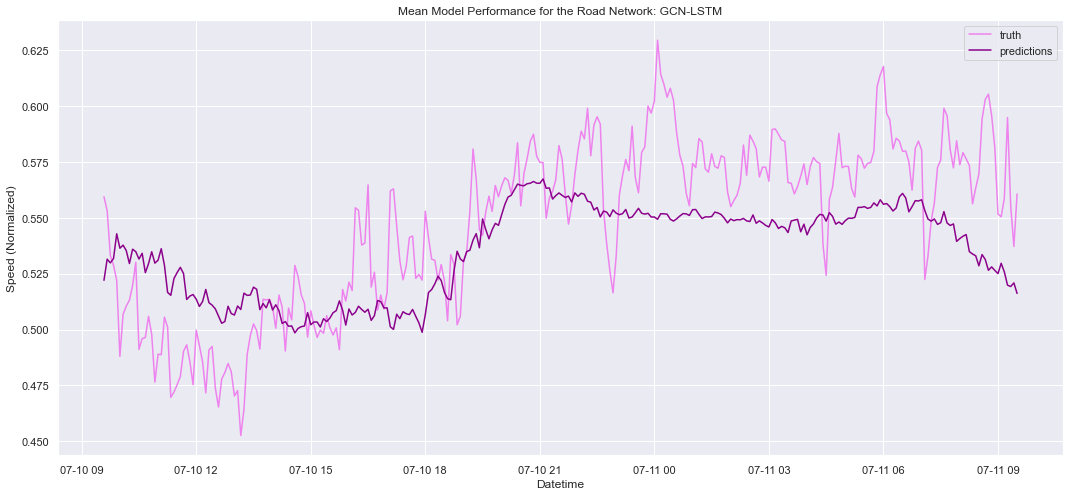

MSE: 0.004181814379990101
MAE: 0.046603236347436905
R2: 0.8868825386168437
53.39759


NameError: name 'predictions' is not defined

In [50]:
from sklearn.metrics import mean_squared_error
model.plot_mean_road_speed_performance("GCN-LSTM",time=time,predictions=yhat.T,true=testY,window=12*24)

def mse( true, predictions):
    '''Return the root mean squared error across the entire road network.
    '''

    mse=[]
    for road_seg in range(predictions.shape[1]):

        # rmse calculation using sklearn
        mse.append(mean_squared_error(true[road_seg,:], predictions[:,road_seg],squared=True))

    mse = np.array(mse)

    return mse       

print(mse(test_rescpred.T,test_rescref).mean())
print(mse(predictions*max_speed,test_rescref).mean())

In [ ]:
predictions.shape

### Geospatial Maps

In [ ]:
model.geoplot_metric("Linear Regression",method="MSE")

In [ ]:
model.geoplot_metric("GCN-LSTM",method="MSE",predictions=yhat.T,true=testY)

In [ ]:
model.plot_mean_road_speed_performance("Linear")